In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [654]:
df = pd.read_csv('athlete_events.csv')

In [655]:
df_medals = df[df["Medal"].notna()]

1. Analyze the performance of a specific country overtime

In [656]:
df_usa = df.loc[df['NOC'] == 'USA']
df_usa = df_usa.drop(columns=['NOC', 'Team'])

In [657]:
medals_usa = df_usa.groupby(["Year", "Medal"]).size().unstack(fill_value=0)
medals_usa = medals_usa[['Bronze', 'Silver', 'Gold']]
medals_usa.head()

Medal,Bronze,Silver,Gold
Year,,,
1896,2,7,11
1900,17,16,30
1904,125,141,128
1906,6,6,12
1908,15,16,34


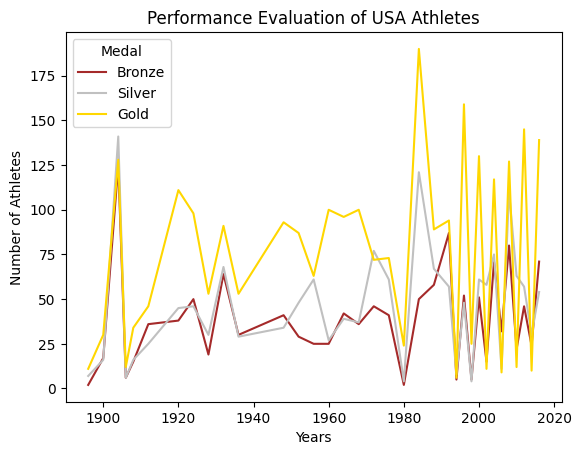

In [658]:
medals_usa.plot(kind = 'line', color=['brown', 'silver', 'gold'])
plt.title('Performance Evaluation of USA Athletes')
plt.xlabel('Years')
plt.ylabel('Number of Athletes')
plt.show()

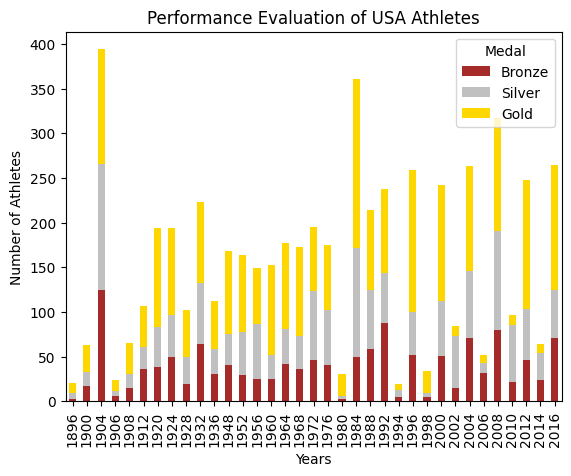

In [659]:
medals_usa.plot(kind = 'bar', stacked = True, color=['brown', 'silver', 'gold'])
plt.title('Performance Evaluation of USA Athletes')
plt.xlabel('Years')
plt.ylabel('Number of Athletes')
plt.show()

2. Investigate whether there's a correlation between athletes' ages and their performance (winning medals).

In [660]:
df_age = df[["Age", "Medal"]].dropna(subset=["Age"])
df_age["Medal_Won"] = df_age["Medal"].notna().astype(int)
df_age

,Age,Medal,Medal_Won
0,24.0,NaN,0
1,23.0,NaN,0
2,24.0,NaN,0
3,34.0,Gold,1
4,21.0,NaN,0
...,...,...,...
271111,29.0,NaN,0
271112,27.0,NaN,0
271113,27.0,NaN,0
271114,30.0,NaN,0


In [661]:
cor = df_age["Age"].corr(df_age["Medal_Won"])

print("Correlation between athelete age and performance: ", cor)

Correlation between athelete age and performance:  0.024126493815174694


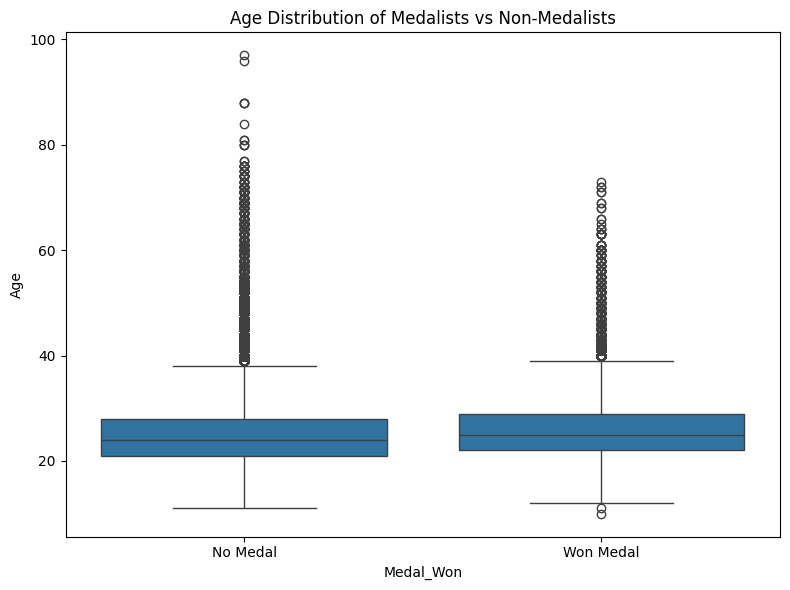

In [662]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Medal_Won", y="Age", data=df_age)
plt.ylabel("Age")
plt.title("Age Distribution of Medalists vs Non-Medalists")
plt.xticks([0, 1], ["No Medal", "Won Medal"])
plt.tight_layout()
plt.show()

3. Explore whether taller athletes tend to perform better in certain sports by analyzing medal distributions.

In [663]:
df_height = df_medals[["Height", "Sport", "Medal"]].dropna()

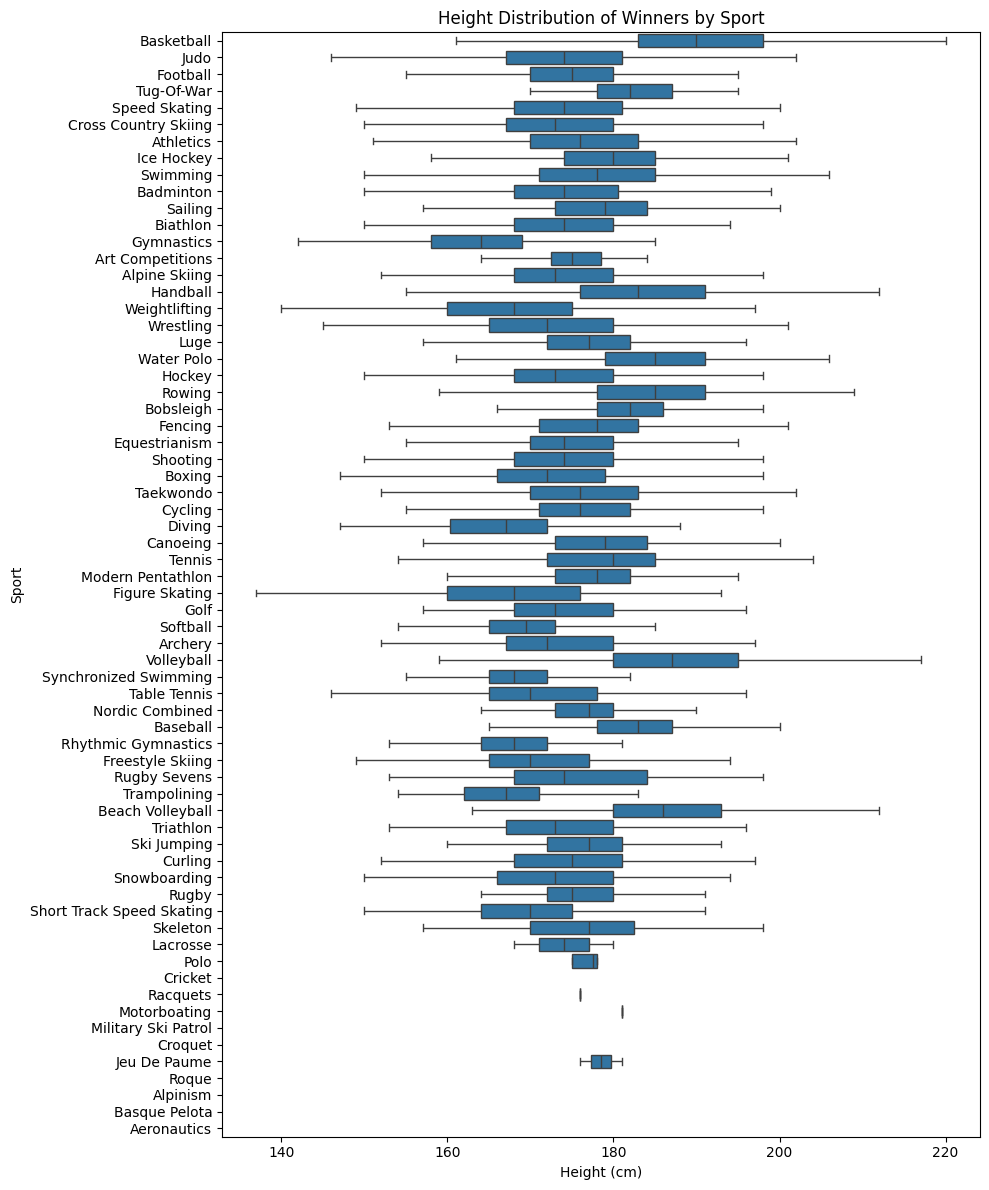

In [664]:
plt.figure(figsize=(10, 12))
sns.boxplot(x="Height", y="Sport", data=df, showfliers=False)
plt.xlabel("Height (cm)")
plt.ylabel("Sport")
plt.title("Height Distribution of Winners by Sport")
plt.tight_layout()
plt.show()

4. Investigate whether weight correlates with performance in weightlifting events.

In [665]:
df_weightlifting = df[(df["Sport"] == "Weightlifting")]
df_weightlifting = df_weightlifting[["Weight", "Medal"]]
df_weightlifting["Medal_Won"] = df_weightlifting["Medal"].notna().astype(int)

correlation = df_weightlifting["Weight"].corr(df_weightlifting["Medal_Won"])
print(f"Correlation between Weight and Medal Performance in Weightlifting: {correlation:.4f}")


Correlation between Weight and Medal Performance in Weightlifting: 0.0350


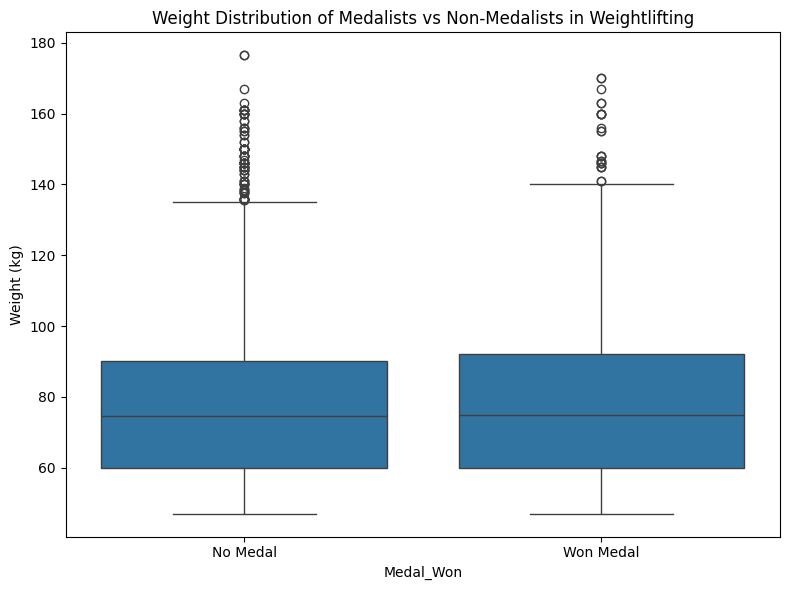

In [666]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Medal_Won", y="Weight", data=df_weightlifting)
plt.ylabel("Weight (kg)")
plt.title("Weight Distribution of Medalists vs Non-Medalists in Weightlifting")
plt.xticks([0, 1], ["No Medal", "Won Medal"])
plt.tight_layout()
plt.show()

5. Analyze gender disparity in medal distribution overtime and across different sports.

In [667]:
df_gen = df_medals[["Year", "Sport", "Sex", "Medal"]]

gen_time = df_medals.groupby(["Year", "Sex"]).size().unstack(fill_value=0)
gen_time.head()

Sex,F,M
Year,,
1896,0,143
1900,13,591
1904,10,476
1906,6,452
1908,16,815


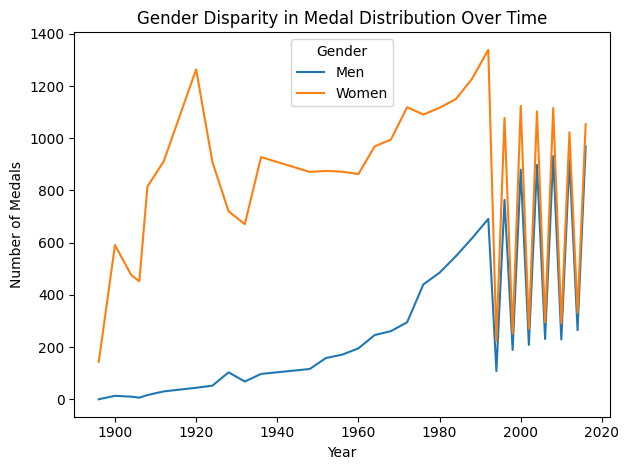

In [668]:
gen_time.plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("Gender Disparity in Medal Distribution Over Time")
plt.legend(title="Gender", labels=["Men", "Women"])
plt.tight_layout()
plt.show()

In [669]:
gen_sport = df_medals.groupby(["Sport", "Sex"]).size().unstack(fill_value=0)
gen_sport.head()

Sex,F,M
Sport,,
Aeronautics,0,1
Alpine Skiing,213,215
Alpinism,1,24
Archery,121,232
Art Competitions,11,145


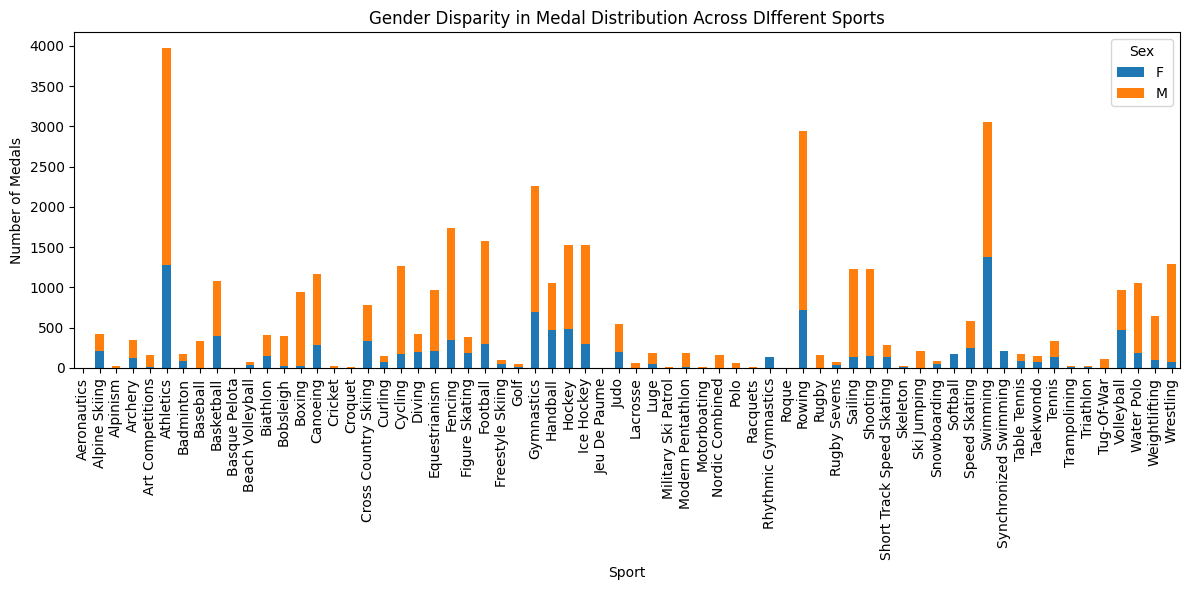

In [670]:
gen_sport.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.title("Gender Disparity in Medal Distribution Across DIfferent Sports")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

6. Analyze whether hosting the Olympics has a significant impact on the performance of athletes from the host country.

7. Investigate the average career length of athletes in different sports and how it correlates with their age and performance.

In [671]:
df_career = df[['Name', 'Year', 'Age', 'Sport', 'Medal']].copy()
df_career['Career Start'] = df_career.groupby('Name')['Year'].transform('min')
df_career['Career End'] = df_career.groupby('Name')['Year'].transform('max')
df_career['Career Length'] = df_career['Career End'] - df_career['Career Start']
df_career.head()

,Name,Year,Age,Sport,Medal,Career Start,Career End,Career Length
0,A Dijiang,1992,24.0,Basketball,NaN,1992,1992,0
1,A Lamusi,2012,23.0,Judo,NaN,2012,2012,0
2,Gunnar Nielsen Aaby,1920,24.0,Football,NaN,1920,1920,0
3,Edgar Lindenau Aabye,1900,34.0,Tug-Of-War,Gold,1900,1900,0
4,Christine Jacoba Aaftink,1988,21.0,Speed Skating,NaN,1988,1994,6


In [672]:
df_career.drop_duplicates(subset=['Name'], inplace=True)
df_career.drop(['Name', 'Career Start', 'Career End'], axis=1, inplace=True)
df_career.head()

,Year,Age,Sport,Medal,Career Length
0,1992,24.0,Basketball,NaN,0
1,2012,23.0,Judo,NaN,0
2,1920,24.0,Football,NaN,0
3,1900,34.0,Tug-Of-War,Gold,0
4,1988,21.0,Speed Skating,NaN,6


8. Explore whether athletes' ages fall into specific groups (e.g., young, prime, senior) and how this influences their performance.

In [673]:
df_age['Age Group'] = pd.cut(df['Age'], bins=[0, 22, 29, 100], labels=['Young', 'Prime', 'Senior'])
df_age.head()

,Age,Medal,Medal_Won,Age Group
0,24.0,NaN,0,Prime
1,23.0,NaN,0,Prime
2,24.0,NaN,0,Prime
3,34.0,Gold,1,Senior
4,21.0,NaN,0,Young


In [674]:
df_agegrp = df_age.groupby(["Age Group", "Medal"]).size().unstack(fill_value=0)
df_agegrp = df_agegrp[['Gold', 'Silver', 'Bronze']]
df_agegrp.head()

C:\Users\Yakina\AppData\Local\Temp\ipykernel_15028\3184163937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agegrp = df_age.groupby(["Age Group", "Medal"]).size().unstack(fill_value=0)


Medal,Gold,Silver,Bronze
Age Group,,,
Young,3858,3615,3782
Prime,6617,6472,6609
Senior,2749,2734,2615


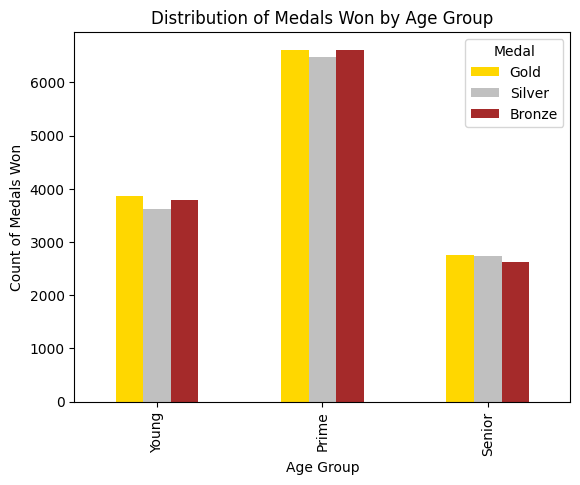

In [675]:
df_agegrp.plot(kind='bar', color = ['gold', 'silver', 'brown'])
plt.title('Distribution of Medals Won by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Medals Won')
plt.show()